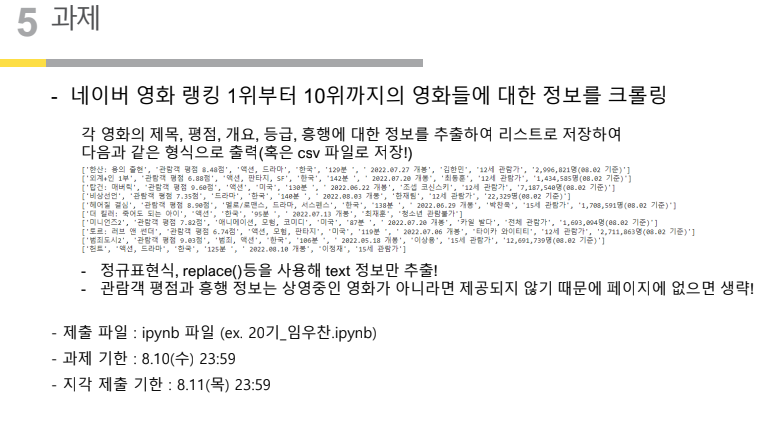

In [4]:
!pip3 install requests
!pip3 install bs4
!pip3 install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 8.4 MB/s 
     |████████████████████████████████| 358 kB 49.2 MB/s 
     |████████████████████████████████| 139 kB 51.3 MB/s 
     |████████████████████████████████| 4.1 MB 44.9 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 58 kB 4.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires u

In [5]:
import requests

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
res = requests.get(url)

print(res) # 응답 객체
res.text # HTML 텍스트

<Response [200]>


'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\r\n\r\n\t\r\n\t\r\n\t\t\r\n\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\t\r\n\t\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\r\n\r\n\r\n\r\n\r\n\r\n<meta property="me2:image" content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg"/>\r\n<meta property="me2:post_tag" content="네이버영화 "/>\r\n<meta property="me2:category1" content="네이버영화"/>\r\n<meta property="me2:category2" content=""/>\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\t<meta property="og:title" content="랭킹 : 네이버 영화"/>\r\n\t\t\r\n\t\t\t\r\n\t\t\t\t<meta property="og

In [6]:
res.status_code # HTTP 상태 코드 

200

##조회순 영화 제목 먼저 뽑아오기

In [9]:
from bs4 import BeautifulSoup

In [19]:
#영화 타이틀 저장할 리스트 
titles = []

soup = BeautifulSoup(res.text, 'html.parser')

#제목 섹션
title = soup.find('tbody')

for i in range(len(title.find_all('a', limit = 10))):
  titles.append(title.find_all('a')[i].get_text())

titles

['비상선언',
 '한산: 용의 출현',
 '외계+인 1부',
 '탑건: 매버릭',
 '헤어질 결심',
 '헌트',
 '카터',
 '프레이',
 '미니언즈2',
 '토르: 러브 앤 썬더']

In [ ]:
print(res.text)

##각 영화 페이지의 링크를 가져오기


In [32]:
title_links = []

soup = BeautifulSoup(res.text, 'lxml')

title_link = soup.find('tbody')

for i in range(len(title_link.find_all('a', limit = 10))):
  front_url = 'http://movie.naver.com/'
  title_links.append(front_url + '/' + title_link.find_all('a')[i]['href'])

title_links

['http://movie.naver.com///movie/bi/mi/basic.naver?code=184519',
 'http://movie.naver.com///movie/bi/mi/basic.naver?code=194196',
 'http://movie.naver.com///movie/bi/mi/basic.naver?code=192151',
 'http://movie.naver.com///movie/bi/mi/basic.naver?code=81888',
 'http://movie.naver.com///movie/bi/mi/basic.naver?code=198413',
 'http://movie.naver.com///movie/bi/mi/basic.naver?code=195758',
 'http://movie.naver.com///movie/bi/mi/basic.naver?code=203101',
 'http://movie.naver.com///movie/bi/mi/basic.naver?code=219628',
 'http://movie.naver.com///movie/bi/mi/basic.naver?code=191634',
 'http://movie.naver.com///movie/bi/mi/basic.naver?code=187347']

##각 영화 페이지에서 세부 정보 가지고 오는 함수 만들기

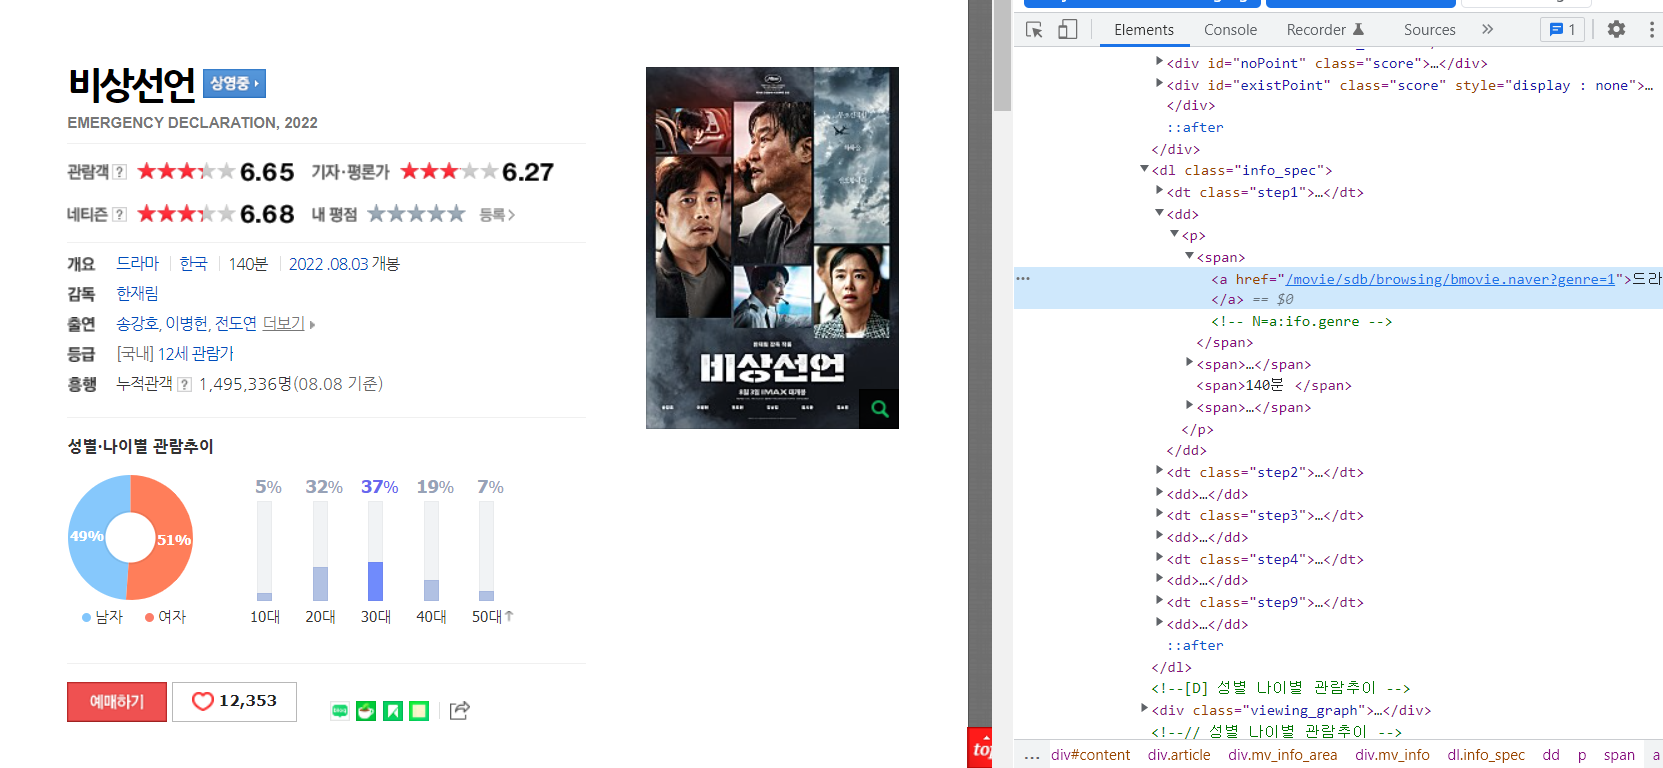

###평점

###장르

In [51]:
genres = []

for i in range(len(title_links)):
  url = title_links[i]

  res = requests.get(url)

  soup = BeautifulSoup(res.text, 'html.parser')

  genre = soup.find('dl', class_ = 'info_spec')

  genres.append(genre.find('a').get_text())

genres


['드라마', '액션', '액션', '액션', '멜로/로맨스', '액션', '액션', '액션', '애니메이션', '액션']

###국가

In [55]:
countries = []

for i in range(len(title_links)):
  url = title_links[i]

  res = requests.get(url)

  soup = BeautifulSoup(res.text, 'html.parser')

  country = soup.find('dl', class_ = 'info_spec')

  countries.append(country.find_all('a')[2].get_text())

countries

[' 2022', '한국', 'SF', ' 2022', '서스펜스', '한국', '한국', '드라마', '코미디', '판타지']

###상영시간

###개봉날짜

###감독

###상영제한나이

###관람객(크롤링 당일 기준)

##최종적으로 리스트 만들기